### Exploratory data analysis on Ford used car dataset
- Performed by Audity Ghosh, CSE, RUET

#### Objectives:
- Perform EDA using groupby and show barplots based on models, transmission and fuelTypes.
- Answer the questions based on the analysis


##### Source of dataset:  https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

#### Import libraries

In [85]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

#### Load data

In [86]:
df = pd.read_csv("ford.csv")
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


### Perform Exploratory Data Analysis (EDA) using groupby/pivot_table and barplot  based on model

##### check the number of unique values in the 'model' column

In [87]:
print(df['model'].unique())

[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo']


There are 23 types of models in this dataset. 

##### Data Aggregation

In [88]:
df_agg_model = df.groupby('model')['price'].agg(['count', 'mean', 'sum']) 
#to get top selling models it is necessary to group by models based on price

display(df_agg_model)

,count,mean,sum
model,,,
B-MAX,355,8287.526761,2942072
C-MAX,543,9914.567219,5383610
EcoSport,1143,12499.268591,14286664
Edge,208,22810.500000,4744584
Escort,1,3000.000000,3000
Fiesta,6556,10196.862569,66850631
Focus,4588,13185.882956,60496831
Fusion,16,2555.812500,40893
Galaxy,228,17841.872807,4067947


##### Data preprocessing before visualization

In [89]:
# sort the dataframe based on the column 'count'
df_agg_model = df_agg_model.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_model['percent_of_cars'] = (df_agg_model['count']/df_agg_model['count'].sum())*100

# convert the 'sum' column in millions
df_agg_model['sum'] = df_agg_model['sum']/1000000

# keep up to two decimal points
df_agg_model = df_agg_model.round(2)

# remove the 'count' column
df_agg_model = df_agg_model.drop('count', axis=1)

display(df_agg_model.head())

,mean,sum,percent_of_cars
model,,,
Fiesta,10196.86,66.85,36.50
Focus,13185.88,60.50,25.54
Kuga,15823.47,35.21,12.39
EcoSport,12499.27,14.29,6.36
C-MAX,9914.57,5.38,3.02


##### Barplot: Percentage of cars, Average and Total selling price of cars by model

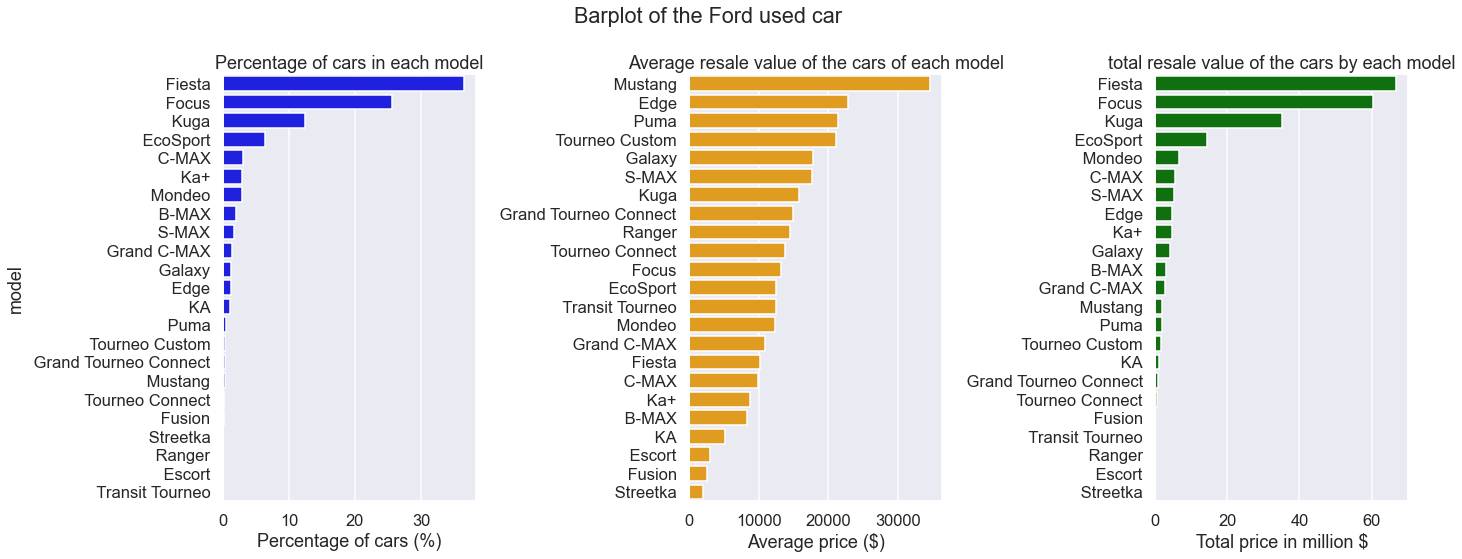

In [90]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
df_agg_model = df_agg_model.sort_values(by='percent_of_cars', ascending=False)
sns.barplot(x='percent_of_cars', y=df_agg_model.index, data=df_agg_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")



plt.subplot(1, 3, 2)
df_agg_model = df_agg_model.sort_values(by='mean', ascending=False)
sns.barplot(x='mean', y=df_agg_model.index, data=df_agg_model, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")


plt.subplot(1, 3, 3)
df_agg_model = df_agg_model.sort_values(by='sum', ascending=False)
sns.barplot(x='sum', y=df_agg_model.index, data=df_agg_model, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")


plt.suptitle("Barplot of the Ford used car")
plt.tight_layout()
plt.show()

In [91]:
df_agg_model

,mean,sum,percent_of_cars
model,,,
Fiesta,10196.86,66.85,36.50
Focus,13185.88,60.50,25.54
Kuga,15823.47,35.21,12.39
EcoSport,12499.27,14.29,6.36
Mondeo,12305.71,6.47,2.93
C-MAX,9914.57,5.38,3.02
S-MAX,17720.23,5.25,1.65
Edge,22810.50,4.74,1.16
Ka+,8707.86,4.62,2.96


- Here, the highest car model is Fiesta(36.50%) 
- The Mustang model has the highest avaerage resale value(34631.263158 dollars)
- The Fiesta model has the highest total price in millions (66850631 million dollars)


##### A. What are the top 5 selling car models in the dataset? 
- Fiesta(36.50%), 
-Focus(25.54%), 
-Kuga(12.39%), 
-EcoSport(6.36%), 
-C-MAX(3.02%) 

##### B. What's the average selling price of the top 5 selling car models? 

In [92]:
# sort the dataframe based on the column 'count'
df_agg_model = df_agg_model.sort_values(by='percent_of_cars', ascending=False)
#display(df_agg_model.head()) #top 5 selling models

df_top_models = df_agg_model.head() #info of only top 5 selling car models
display(df_top_models)
#average selling price of the top 5 selling car models
print("Average selling price of the top 5 selling car models ",round(df_top_models['mean'].mean(),2), "dollars")

,mean,sum,percent_of_cars
model,,,
Fiesta,10196.86,66.85,36.50
Focus,13185.88,60.50,25.54
Kuga,15823.47,35.21,12.39
EcoSport,12499.27,14.29,6.36
C-MAX,9914.57,5.38,3.02


Average selling price of the top 5 selling car models  12324.01 dollars


##### C. What's the total sale of the top 5 selling car models? 



In [93]:

#total selling price of the top 5 selling car models
print("The total sale of the top 5 selling car models ",df_top_models['sum'].sum()," million dollars")

The total sale of the top 5 selling car models  182.23  million dollars


### Perform Exploratory Data Analysis (EDA) using groupby/pivot_table and barplot  based on transmission

##### check the number of unique values in the 'transmission' column

In [94]:
print(df['transmission'].unique())

['Automatic' 'Manual' 'Semi-Auto']


##### Data Aggregation

In [95]:
df_agg_transmission = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_transmission)

,count,mean,sum
transmission,,,
Automatic,1360,15734.022794,21398271
Manual,15517,11792.490043,182984068
Semi-Auto,1087,14919.034039,16216990


##### Data preprocessing before visualization

In [96]:
# sort the dataframe based on the column 'count'
df_agg_transmission = df_agg_transmission.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each transmission
df_agg_transmission['percent_of_cars'] = (df_agg_transmission['count']/df_agg_transmission['count'].sum())*100

# convert the 'sum' column in millions
df_agg_transmission['sum'] = df_agg_transmission['sum']/1000000

# keep up to two decimal points
df_agg_transmission = df_agg_transmission.round(2)

# remove the 'count' column
df_agg_transmission = df_agg_transmission.drop('count', axis=1)

display(df_agg_transmission.head())

,mean,sum,percent_of_cars
transmission,,,
Manual,11792.49,182.98,86.38
Automatic,15734.02,21.40,7.57
Semi-Auto,14919.03,16.22,6.05


##### Barplot: Percentage of cars, Average and Total selling price of cars by transmission

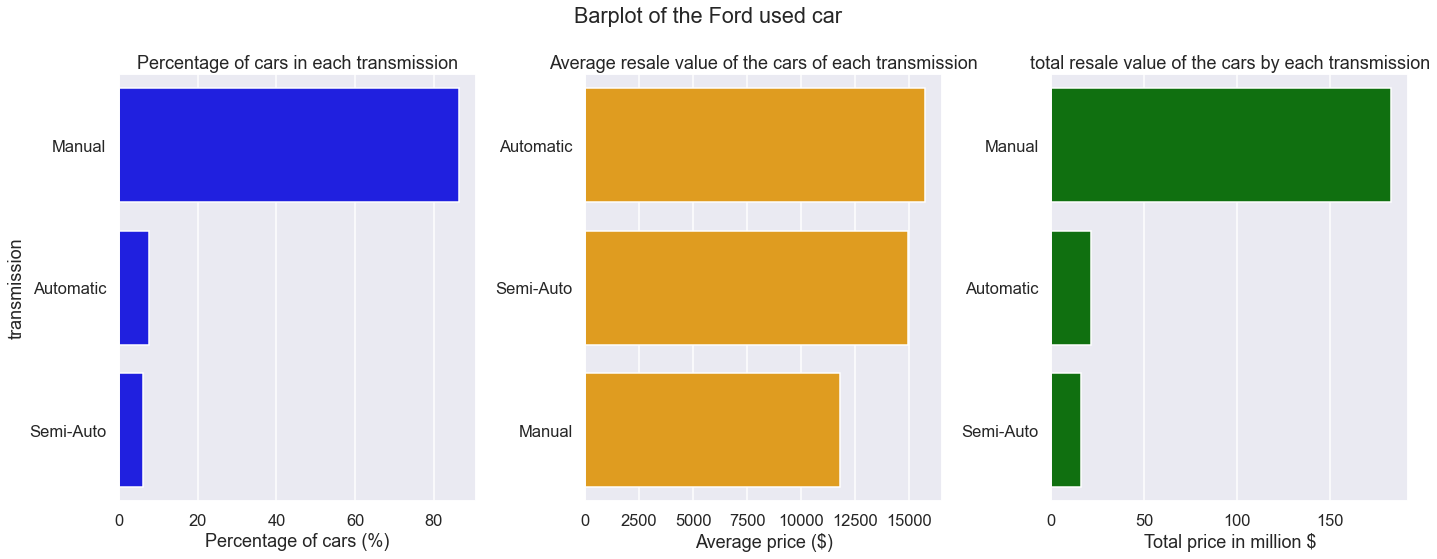

In [97]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
df_agg_transmission = df_agg_transmission.sort_values(by='percent_of_cars', ascending=False)
sns.barplot(x='percent_of_cars', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='blue')
plt.title("Percentage of cars in each transmission")
plt.xlabel("Percentage of cars (%)")


plt.subplot(1, 3, 2)
df_agg_transmission = df_agg_transmission.sort_values(by='mean', ascending=False)
sns.barplot(x='mean', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='orange')
plt.title("Average resale value of the cars of each transmission")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
df_agg_transmission = df_agg_transmission.sort_values(by='sum', ascending=False)
sns.barplot(x='sum', y=df_agg_transmission.index, data=df_agg_transmission, orient='h', color='green')
plt.title("total resale value of the cars by each transmission")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Ford used car")
plt.tight_layout()
plt.show()

- The highest selling transmission is Manual(86.38%)
- The highest average resale value is Automatic's (15734.02 dollars)
- The highest total resale value is Manual's (182.98 million dollars)

##### A. What are the top 5 selling transmission in the dataset? 
- There are 3 types of transmission, among them Manual is the highest(86.38%), Automatic(7.57%), Semi-Auto(6.05%)

##### B. What's the average selling price of the top 3 selling transmission?

In [98]:
 print("The average selling price of top 3 selling transmission ",round(df_agg_transmission['mean'].mean(),2),"dollars")

The average selling price of top 3 selling transmission  14148.51 dollars


##### C. What's the total sale of the top 3 selling transmission?

In [99]:
print("The total selling price of top 3 selling transmission ",round(df_agg_transmission['sum'].sum(),2),"million dollars")

The total selling price of top 3 selling transmission  220.6 million dollars


### Perform Exploratory Data Analysis (EDA) using groupby/pivot_table and barplot  based on fuelType

##### check the number of unique values in the 'fuelType' column

In [100]:
print(df['fuelType'].unique())

['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


##### Data Aggregation

In [101]:
df_agg_fuelType = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_fuelType)

,count,mean,sum
fuelType,,,
Diesel,5762,13659.173724,78704159
Electric,2,15737.500000,31475
Hybrid,22,22149.090909,487280
Other,1,13800.000000,13800
Petrol,12177,11608.985382,141362615


##### Data preprocessing before visualization

In [102]:
# sort the dataframe based on the column 'count'
df_agg_fuelType = df_agg_fuelType.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each fuelType
df_agg_fuelType['percent_of_cars'] = (df_agg_fuelType['count']/df_agg_fuelType['count'].sum())*100

# convert the 'sum' column in millions
df_agg_fuelType['sum'] = df_agg_fuelType['sum']/1000000

# keep up to two decimal points
df_agg_fuelType = df_agg_fuelType.round(2)

# remove the 'count' column
df_agg_fuelType = df_agg_fuelType.drop('count', axis=1)

display(df_agg_fuelType.head())

,mean,sum,percent_of_cars
fuelType,,,
Petrol,11608.99,141.36,67.79
Diesel,13659.17,78.70,32.08
Hybrid,22149.09,0.49,0.12
Electric,15737.50,0.03,0.01
Other,13800.00,0.01,0.01


##### Barplot: Percentage of cars, Average and Total selling price of cars by fuelType

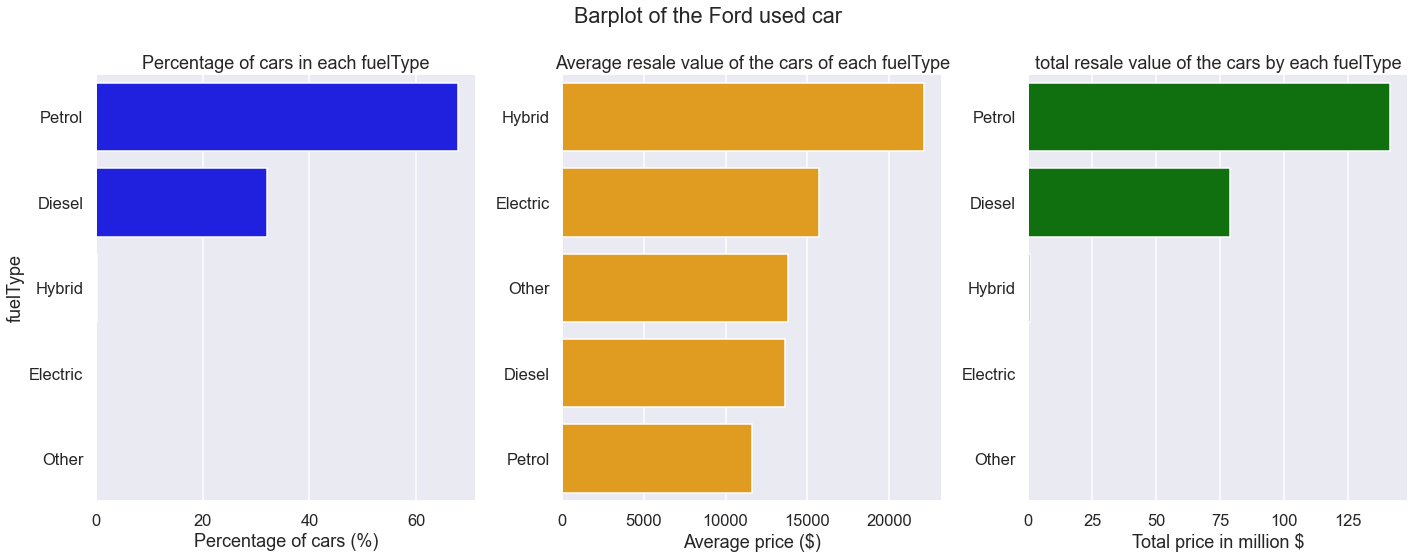

In [103]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
df_agg_fuelType = df_agg_fuelType.sort_values(by='percent_of_cars', ascending=False)
sns.barplot(x='percent_of_cars', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='blue')
plt.title("Percentage of cars in each fuelType")
plt.xlabel("Percentage of cars (%)")


plt.subplot(1, 3, 2)
df_agg_fuelType = df_agg_fuelType.sort_values(by='mean', ascending=False)
sns.barplot(x='mean', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='orange')
plt.title("Average resale value of the cars of each fuelType")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
df_agg_fuelType = df_agg_fuelType.sort_values(by='sum', ascending=False)
sns.barplot(x='sum', y=df_agg_fuelType.index, data=df_agg_fuelType, orient='h', color='green')
plt.title("total resale value of the cars by each fuelType")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Ford used car")
plt.tight_layout()
plt.show()

- The highest selling fuelType is Petrol(67.79%)
- The highest average resale value is Hybrid's (22149.09 dollars)
- The highest total resale value is Petrol's (141.36 million dollars)

##### A. What are the top 5 selling fuelType in the dataset?
- Petrol(67.79%)
- Diesel(32.08%)
- Hybrid(0.12%)
- Electric(0.01%)
- Other(0.01%)

##### B. What's the average selling price of the top 5 selling fuelTypes?

In [104]:
print("The average selling price of top 5 selling fuelTypes ",round(df_agg_fuelType['mean'].mean(),2),"dollars")

The average selling price of top 5 selling fuelTypes  15390.95 dollars


##### C. What's the total sale of the top 5 selling fuelTypes?

In [105]:
print("The total selling price of top 5 selling fuelType ",round(df_agg_fuelType['sum'].sum(),2),"million dollars")

The total selling price of top 5 selling fuelType  220.59 million dollars
